In [1]:
import seaborn as sns
from palettable.cartocolors.qualitative import Bold_6
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import numpy as np
import geopandas as gpd


# Default styles based on seaborn themes

This uses seaborn to control the default style and a colormap.

The cell below is the only one that needs to be run. The rest should just work.

In [ ]:
sns.set_theme(context="paper", style="ticks", rc={'patch.force_edgecolor': False}, palette=Bold_6.hex_colors)
plt.rc("axes.spines", top=False, right=False)

In [2]:
s = pd.read_parquet(f"../data/sample.parquet")

s.index = s.eFUA_ID.astype(int)
myfolders = os.listdir("../data")
myfolders.remove("sample.parquet")
# initialize lists for quantile values
maq = []
miq = []

# loop trough folders containing polygon data
for folder in myfolders[0:90]: # first 90 data sets
    
    i = int(folder)
    
    # read data
    polygons = gpd.read_parquet(f"../data/" + str(i) + "/polygons")
    
    # get title for plots
    mytitle = s.at[i, "eFUA_name"] + " (" + s.at[i, "Cntry_name"] + ")"
    
    #### "2D" PLOT:
    # fig, ax = plt.subplots(1,1,figsize = (20,20))
    # polygons[['area', 'reock']].plot.scatter('area', 'reock', ax=ax, color='b', s=.3)
    # ax.set_xlim(0, 50000)
    # ax.set_title(mytitle)
    # fig.savefig("../plots/2d/" + folder + ".png")
    # plt.close(fig)
    # del(fig, ax)
    
    #### "1D" plot:
    
    # scale data for frequency plot
    data = polygons[['area', 'reock']]
    scaler = RobustScaler(with_centering=False)
    scaled = scaler.fit_transform(data)
    exp = 2
    index = ((scaled[:, 0] ** (1/exp)) * (scaled[:, 1] ** (1/exp)))
    # fig, ax = plt.subplots(1,1, figsize = (20,8))
    # pd.Series(index).plot.hist(ax = ax, bins=1000)
    # ax.set_title(mytitle)
    # fig.savefig("../plots/1d/" + folder + ".png")
    # plt.close(fig)
    # #### QUANTILES:
    
    # get 75% quantile for quantile plots
    maq.append(np.quantile(polygons["area"], 0.75))
    miq.append(np.quantile(index, 0.75))
    
    del(scaler, scaled, index)

Text(0.5, 1.0, 'Range of banana indeces?')

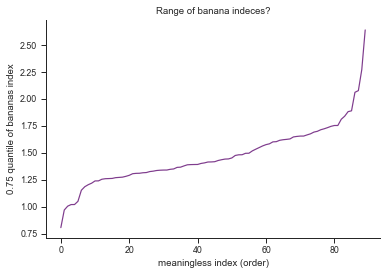

In [24]:
plt.plot(sorted(miq))
plt.xlabel("meaningless index (order)")
plt.ylabel("0.75 quantile of bananas index")
plt.title("Range of banana indeces?")

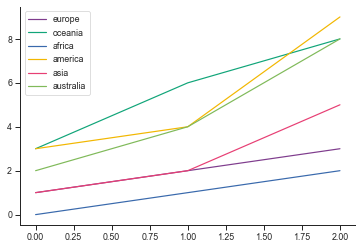

In [25]:
europe = [1,2,3]
oceania = [3,6,8]
africa = [0,1,2]
america = [3,4,9]
australia = [2,4,8]
asia = [1,2,5]

plt.plot(europe, label = "europe")
plt.plot(oceania, label = "oceania")
plt.plot(africa, label = "africa")
plt.plot(america, label = "america")
plt.plot(asia, label = "asia")
plt.plot(australia, label = "australia")

plt.legend()

<AxesSubplot:xlabel='FUA_area', ylabel='FUA_p_2015'>

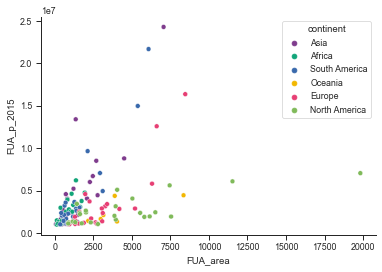

In [29]:
sns.scatterplot(x="FUA_area", y="FUA_p_2015", data=s, hue="continent")